In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('case-hosp-death.csv')
df.head()

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,02/29/2020,1,14,0
1,03/01/2020,1,4,0
2,03/02/2020,0,23,0
3,03/03/2020,2,22,0
4,03/04/2020,5,22,0


In [3]:
df['DATE_OF_INTEREST'] = pd.to_datetime(df.DATE_OF_INTEREST)

In [49]:
X = df.drop(['DATE_OF_INTEREST','HOSPITALIZED_COUNT'],axis=1)
y = df['HOSPITALIZED_COUNT']

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

In [54]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [56]:
clf.score(x_test,y_test)

0.9369103844595145

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

16541.528609291254
0.9369103844595146


In [33]:
train_df = df[df['DATE_OF_INTEREST'] < '2020-04-07'] 

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,2020-02-29,1,14,0
1,2020-03-01,1,4,0
2,2020-03-02,0,23,0
3,2020-03-03,2,22,0
4,2020-03-04,5,22,0


In [34]:
train_true_labels = train_df['HOSPITALIZED_COUNT']

In [35]:
train_df.drop(['HOSPITALIZED_COUNT'], axis=1,inplace=True)

/Users/prerakshah/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
train_df.head()   #X_train

,DATE_OF_INTEREST,CASE_COUNT,DEATH_COUNT
0,2020-02-29,1,0
1,2020-03-01,1,0
2,2020-03-02,0,0
3,2020-03-03,2,0
4,2020-03-04,5,0


In [38]:
train_true_labels[:5] #y_train

0    14
1     4
2    23
3    22
4    22
Name: HOSPITALIZED_COUNT, dtype: int64

In [14]:
actual_label_df = df[(df['DATE_OF_INTEREST'] > '2020-04-06') & (df['DATE_OF_INTEREST'] < '2020-04-17')]

In [23]:
true_labels = actual_label_df['HOSPITALIZED_COUNT']

In [25]:
actual_label_df.drop(['HOSPITALIZED_COUNT'], axis=1,inplace=True)

/Users/prerakshah/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
actual_label_df.head() #X_test

,DATE_OF_INTEREST,CASE_COUNT,DEATH_COUNT
38,2020-04-07,6051,590
39,2020-04-08,5562,544
40,2020-04-09,5035,534
41,2020-04-10,4495,517
42,2020-04-11,3710,523


In [40]:
true_labels[:5]  #y_test

38    1561
39    1512
40    1390
41    1306
42    1071
Name: HOSPITALIZED_COUNT, dtype: int64

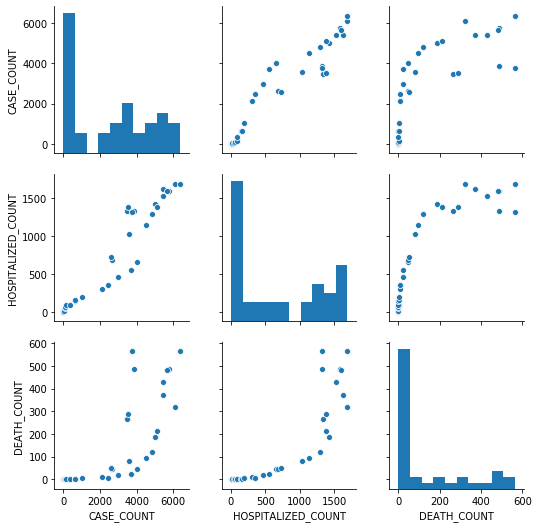

In [11]:
sns.pairplot(train_df)

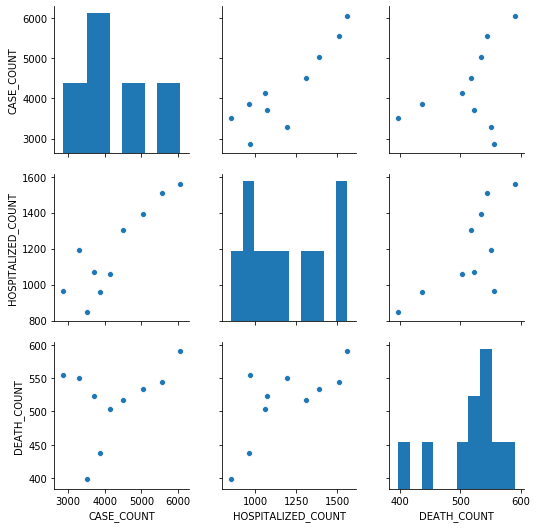

In [22]:
sns.pairplot(actual_label_df)

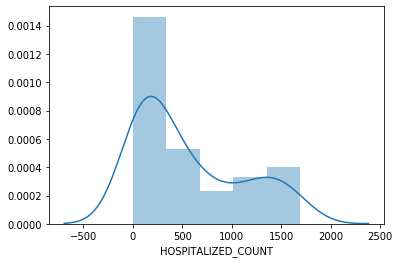

In [6]:
sns.distplot(df.HOSPITALIZED_COUNT)

In [44]:
train_df.head()

,DATE_OF_INTEREST,CASE_COUNT,DEATH_COUNT
0,2020-02-29,1,0
1,2020-03-01,1,0
2,2020-03-02,0,0
3,2020-03-03,2,0
4,2020-03-04,5,0


In [42]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [45]:
clf.fit(train_df[['CASE_COUNT','DEATH_COUNT']],train_true_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
clf.predict(actual_label_df[['CASE_COUNT','DEATH_COUNT']])

array([1889.32279699, 1740.28586344, 1621.18708144, 1492.06512935,
       1336.58258841, 1197.04323392, 1279.79616756, 1402.36174976,
       1278.50505221, 1165.25202817])

In [47]:
clf.score(actual_label_df[['CASE_COUNT','DEATH_COUNT']],true_labels)

-0.2835076328370276